# THỰC HÀNH 2: MÁY HỌC CƠ BẢN PHẦN 2

Nguyễn Ngọc Thức

21521506

In [348]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
iris = load_iris()
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [350]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [351]:
class MyLogisticRegression:
    def __init__(self, alpha=0.01, iter=1000):
        self.alpha = alpha
        self.iter = iter
        self.thetas = None
        self.losses = []

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def compute_loss(self, y_true, y_hat):
        return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

    def compute_gradient(self, X, y_true, y_hat):
        return (X.T @ (y_hat - y_true))/len(y_true)
    
    def initializers(self, X):
        return np.zeros(X.shape[1])
    
    def concatX(self,X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def fit(self, X, y):
        X = self.concatX(X)
        self.thetas = self.initializers(X)
        for _ in range(self.iter):
            y_hat = self.sigmoid(X @ self.thetas.T)
            self.losses.append(self.compute_loss(y, y_hat))
            self.thetas -= self.alpha * self.compute_gradient(X,y,y_hat)
    
    def predict(self, X): 
        X = self.concatX(X)
        # print(X @ self.thetas.T)
        return (self.sigmoid(X @ self.thetas.T) >= 0.5).astype(int)

### Bài 1: Các bạn hiện thực lại mô hình Logistic Regression theo các hướng dẫn ở mục 2. Huấn luyện mô hình với siêu tham số alpha = 0.1 và iter = 100.

In [352]:
LogReg = MyLogisticRegression(alpha=0.1, iter=100)
LogReg.fit(X,y)
y_new = LogReg.predict(X_new)
LogReg.thetas

array([-1.21750324,  0.75168712])

### Bài 2: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho 100 dòng dữ liệu đầu tiên từ tập dữ liệu gốc. So sánh kết quả dự đoán với nhãn thực sự của dữ liệu.
Gợi ý: Để lấy ra 100 dòng dữ liệu đầu tiên, ta dùng lệnh: X[1:100] và y[1:100]. Có thể dùng accuracy_score để tính độ chính xác của dự đoán.


In [353]:
y100 = y[:100]
y_pred100 = LogReg.predict(X[:100])
print("Accurancy: ", accuracy_score(y100, y_pred100))

Accurancy:  0.98


### Bài 3: Trong Bước 5, với mỗi lần lặp để cập nhật trọng số, hãy tính giá trị hàm mất mát của mỗi lần lặp và đưa vào list loss. Vẽ biểu đồ giá trị loss sau mỗi lần lặp. 
Gợi ý: dùng hàm lineplot trong seaborn để vẽ biểu đồ giá trị của hàm loss sau mỗi lần cập nhật trọng số. Tính giá trị hàm mất mát bằng hàm compute_loss ở Bước 3.


In [354]:
losses = LogReg.losses

<AxesSubplot:>

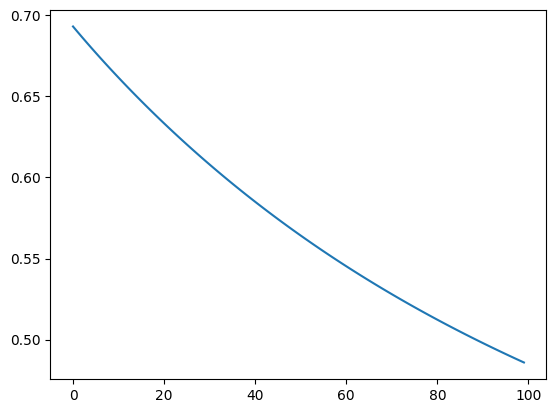

In [355]:
sns.lineplot(losses)

### Bài 4: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho dữ liệu X_new.

In [356]:
y_pred_Xnew = LogReg.predict(X_new)
print(y_pred_Xnew)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Bài 5: Các bạn hãy dùng thư viện Logistic Regression trong sklearn để dự đoán, và so sánh kết quả giữa dùng thư viện và làm bằng tay đối với Bài 2 và Bài 4.

In [357]:
skLogReg = LogisticRegression(max_iter=100, penalty='none')
skLogReg.fit(X, y)
sk_y_pred_new = skLogReg.predict(X_new)
sk_y_pred100 = skLogReg.predict(X[:100])

In [358]:
print("Accuracy khi dùng code dự đoán 100 mẫu đầu tiên", accuracy_score(y[:100], y_pred100))
print("Accuracy khi dùng thư viện dự đoán 100 mẫu đầu tiên", accuracy_score(y[:100], sk_y_pred100))

Accuracy khi dùng code dự đoán 100 mẫu đầu tiên 0.98
Accuracy khi dùng thư viện dự đoán 100 mẫu đầu tiên 0.98


Vì không có dữ liệu y_new nên tạm thời coi kết quả dự đoán khi dùng thư viện là đúng (y_true), coi kết quả dự đoán bằng code là predict (y_predict)

In [359]:
accuracy_score(sk_y_pred_new, y_pred_Xnew)

0.996

Do tổng cộng có 1000 mẫu X_new, mà độ chính xác được tính là 0.996 => kết quả dự đoán khi tự code chỉ lệch 4 mẫu so với dùng thư viện. Điều này xảy ra có thể là do thư viện sklearn và tự code có cách khởi tạo bộ theta0 không giống nhau. 

### Bài 6*: Hãy sử dụng các thuộc tính khác như Petal Length, Sepal Length và Sepal Width để huấn luyện cho mô hình, và cho biết kết quả. 

Sử dụng tham số Petal Length

In [360]:
iris = load_iris()
X = iris["data"][:, 2:3]
y = (iris["target"] == 2).astype(int)

In [361]:
LogReg = MyLogisticRegression(alpha=0.1, iter=100)
LogReg.fit(X,y)
y100 = y[:100]
y_pred100 = LogReg.predict(X[:100])
print("Accurancy: ", accuracy_score(y100, y_pred100))

Accurancy:  0.96


Sử dụng tham số Sepal Length

In [362]:
iris = load_iris()
X = iris["data"][:, 0:1]
y = (iris["target"] == 2).astype(int)

In [363]:
LogReg = MyLogisticRegression(alpha=0.1, iter=100)
LogReg.fit(X,y)
y100 = y[:100]
y_pred100 = LogReg.predict(X[:100])
print("Accurancy: ", accuracy_score(y100, y_pred100))

Accurancy:  1.0


Sử dụng tham số Sepal Width

In [364]:
iris = load_iris()
X = iris["data"][:, 1:2]
y = (iris["target"] == 2).astype(int)

In [365]:
LogReg = MyLogisticRegression(alpha=0.1, iter=100)
LogReg.fit(X,y)
y100 = y[:100]
y_pred100 = LogReg.predict(X[:100])
print("Accurancy: ", accuracy_score(y100, y_pred100))

Accurancy:  1.0
